<a href="https://colab.research.google.com/github/JayellWolfe/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/DS7_Unit_2__Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#split data  50/50

y = df['price'].values
X = df['bedrooms'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state = 42)

In [0]:
#fit the model

reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)

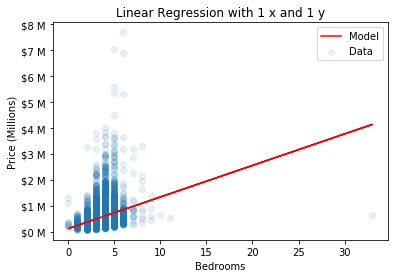

In [8]:
#plot

fig, ax = plt.subplots()
ax.scatter(X_test, y_test, label='Data', alpha=0.1);
ax.plot(X_test, y_hat, color='r', label='Model');
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price (Millions)')
ax.set_title('Linear Regression with 1 x and 1 y');

# Function for creating a more neatly-formatted y-axis
def millions(x, pos):
     return f'${x/1e6:.0f} M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend();

In [0]:
def printouts(X_test, y_test, reg):
    '''
    Calculates coefficients and errors.

    X_test: Test data
    y_test: Test results
    reg:    Regression model, fit to training data and results
    '''
    y_hat = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    r_squared = reg.score(X_test, y_test)


    print(f'Coefficients: {reg.coef_}')
    print(f'Intercept: {reg.intercept_:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R^2: {r_squared:.3f}')

In [11]:
printouts(X_test, y_test, reg)

Coefficients: [121771.49525817]
Intercept: 127548.13
RMSE: 367807.38
R^2: 0.092


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
# add 2nd variable = sqft_living 

y = df['price'].values # Row vector is OK for y.
X = df[['sqft_living','bedrooms']].values # Already has right shape

# Split data 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     test_size=0.5, random_state=42)

reg = LinearRegression().fit(X_train, y_train) # fit the model

y_hat = reg.predict(X_test)  # vector of predictions
beta_0 = reg.intercept_ # Intercept
beta_i = reg.coef_   # Regression coefficients

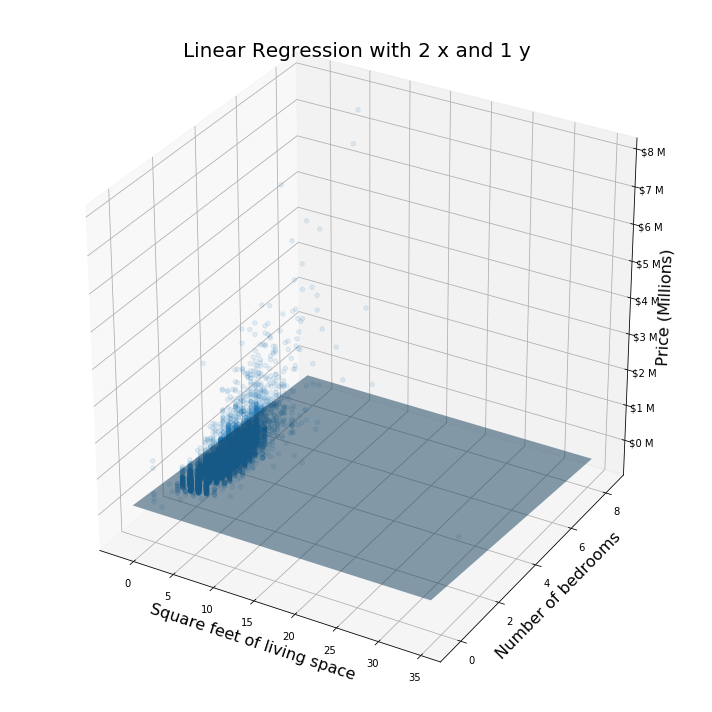

In [17]:
### Plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot datapoints
ax.scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.1);

# Set axes to size of scatter data. zz contains the coordinates
# of the four corners of the plane that we want to plot.
x1 = np.array(ax.get_xlim()) 
y1 = np.array(ax.get_ylim()) 
xx, yy = np.meshgrid(x1,y1)  
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0

# Plot plane
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Add labels
ax.set_xlabel('Square feet of living space', fontsize=16)
ax.set_ylabel('Number of bedrooms', fontsize=16)
ax.set_zlabel('Price (Millions)', fontsize=16)
ax.set_title('Linear Regression with 2 x and 1 y', fontsize=20);

# Function for creating a more neatly-formatted y-axis
def millions(x, pos):
    'The two args are the value and tick position'
    return f'${x/1e6:.0f} M'
ax.zaxis.set_major_formatter(FuncFormatter(millions))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

In [14]:
printouts(X_test, y_test, reg)

Coefficients: [   304.72984939 -61633.19206584]
Intercept: 111190.52
RMSE: 271767.19
R^2: 0.504


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
#using all the variables 

y = df['price'].values

# Remove all the columns that we probably shouldn't be regressing against
X = df.drop(columns=['price','date','id']).values

# Split data 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     test_size=0.5, random_state=42)

reg = LinearRegression().fit(X_train, y_train) # fit the model

In [19]:
printouts(X_test, y_test, reg)

Coefficients: [-3.41930712e+04  3.97125261e+04  9.91229818e+01  1.04057427e-01
  1.00431682e+04  5.73273418e+05  5.36941305e+04  2.47210264e+04
  9.94432289e+04  6.02382104e+01  3.88847715e+01 -2.48044346e+03
  2.12570728e+01 -5.43588580e+02  5.91178244e+05 -1.85711473e+05
  2.64961862e+01 -3.65903971e-01]
Intercept: 6705339.55
RMSE: 215700.36
R^2: 0.688


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
